# Session #3 Homework

## Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

In [55]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
data.shape

(11914, 16)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [59]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

Select only them and fill in the missing values with 0.

In [60]:
features = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP'
]

In [61]:
data = data[features]

In [62]:
data = data.rename(columns={'MSRP': 'price'})
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [64]:
data.nunique()

make                   48
model                 915
year                   28
engine_hp             356
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
price                6049
dtype: int64

In [65]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [66]:
data['engine_hp'] = data['engine_hp'].fillna(0)
data['engine_cylinders'] = data['engine_cylinders'].fillna(0)

In [67]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [68]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


## Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

In [69]:
data.describe(include=["O"])

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


In [70]:
data['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

## Question 2

* Create the correlation matrix for the numerical features of your dataset
* In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset
* What are the two features that have the biggest correlation in this dataset?

In [71]:
data_numeric = data.copy()
data_numeric = data.drop(['make', 'model', 'transmission_type', 'vehicle_style', 'price'], axis=1)
data_numeric.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,247.941749,5.614655,26.637485,19.733255
std,7.579740,110.507669,1.800554,8.863001,8.987798
min,1990.000000,0.000000,0.000000,12.000000,7.000000
25%,2007.000000,170.000000,4.000000,22.000000,16.000000
50%,2015.000000,225.000000,6.000000,26.000000,18.000000
75%,2016.000000,300.000000,6.000000,30.000000,22.000000
max,2017.000000,1001.000000,16.000000,354.000000,137.000000


In [72]:
data_numeric.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


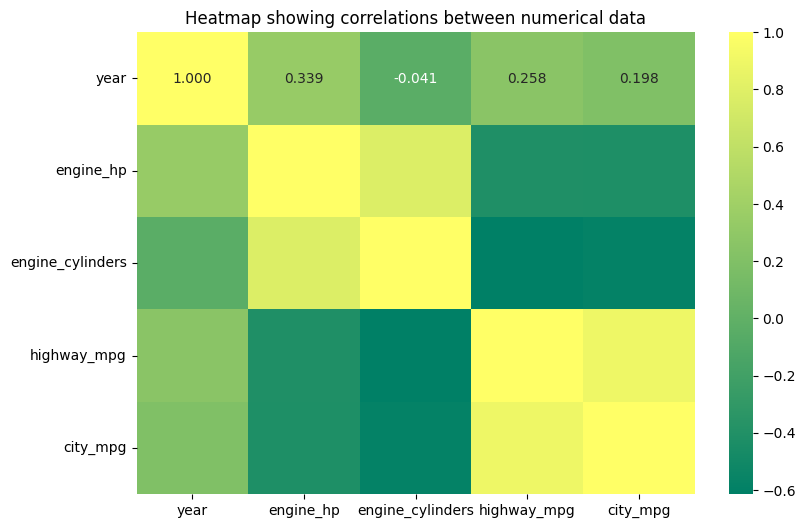

In [73]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [74]:
data_numeric.corr().unstack().sort_values(ascending = False)

year              year                1.000000
engine_hp         engine_hp           1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
city_mpg          city_mpg            1.000000
                  highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
engine_hp         year                0.338714
year              engine_hp           0.338714
                  highway_mpg         0.258240
highway_mpg       year                0.258240
city_mpg          year                0.198171
year              city_mpg            0.198171
                  engine_cylinders   -0.040708
engine_cylinders  year               -0.040708
highway_mpg       engine_hp          -0.415707
engine_hp         highway_mpg        -0.415707
                  city_mpg           -0.424918
city_mpg          engine_hp          -0.424918
             

`highway_mpg` and `city_mpg`

## Make price binary

* Now we need to turn the `price` variable from numeric into binary format
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise

In [75]:
data['price'].mean()

40594.737032063116

In [76]:
data_class = data.copy()
mean = data_class['price'].mean()

data_class['above_average'] = np.where(data_class['price']>=mean,1,0)

In [77]:
data_class = data_class.drop(['price'], axis=1)

In [78]:
data_class

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`
* Make sure that the target value (`price`) is not in your dataframe

In [79]:
SEED = 42

In [80]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(data_class) == (len(df_train) + len(df_val) + len(df_test))

In [81]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [82]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [83]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

## Question 3

* Calculate the *mutual information* score between `above_average` and other categorical variables in our dataset. Use the training set only
* Round the scores to 2 decimals using round(score, 2)
* Which of these variables has the lowest score?

In [84]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

In [85]:
cat = ['make', 'model', 'transmission_type', 'vehicle_style']

In [86]:
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
model,0.462344
make,0.239769
vehicle_style,0.084143
transmission_type,0.020958


`transmission_type` has the lowest score.

In [87]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

assert 'above_average' not in df_train.columns
assert 'above_average' not in df_val.columns
assert 'above_average' not in df_test.columns

## Question 4

* Now let's train a logistic regression
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding
* Fit the model on the training dataset:
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits

In [88]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [89]:
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [90]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [91]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.95


## Question 5

* Let's find the least useful feature using the _feature elimination_ technique
* Train a model with all these features (using the same parameters as in Q4)
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature
* Which of following feature has the smallest difference?
    * `neighbourhood_group`
    * `room_type`
    * `number_of_reviews`
    * `reviews_per_month`
> **note:** the difference doesn't have to be positive

In [92]:
features = df_train.columns.to_list()
features

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [93]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [94]:
scores

,eliminated_feature,accuracy,difference
0,make,0.946706,0.003294
1,model,0.924045,0.025955
2,year,0.947965,0.002035
3,engine_hp,0.927822,0.022178
4,engine_cylinders,0.945867,0.004133
5,transmission_type,0.945027,0.004973
6,vehicle_style,0.932438,0.017562
7,highway_mpg,0.946706,0.003294
8,city_mpg,0.932438,0.017562


In [95]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
2,year,0.947965,0.002035


`year` feature is the least important

## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data:
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * `model = Ridge(alpha=a, solver="sag", random_state=42)`
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

In [96]:
data['price'] = np.log1p(data['price'])

In [138]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [139]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [140]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [141]:
df_train = df_train.drop('price', axis=1)
df_val = df_val.drop('price', axis=1)
df_test = df_test.drop('price', axis=1)

assert 'price' not in df_train.columns
assert 'price' not in df_val.columns
assert 'price' not in df_test.columns

In [142]:
y_train.shape, y_val.shape

((7148,), (2383,))

In [143]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [144]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha, solver='sag', random_state=SEED)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = mean_squared_error(y_val, y_pred, squared=False)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

alpha = 0:	 RMSE = 0.48679431324238925
alpha = 0.01:	 RMSE = 0.48679455192752635
alpha = 0.1:	 RMSE = 0.48679670001899783
alpha = 1:	 RMSE = 0.4868181745432734
alpha = 10:	 RMSE = 0.48703228329751214


In [155]:
scores

{0: 0.487, 0.01: 0.487, 0.1: 0.487, 1: 0.487, 10: 0.487}

In [156]:
print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')

The smallest `alpha` is 0.
